<a href="https://colab.research.google.com/github/jesicagimenez94/DataAnalyst/blob/main/Dashboard_Rick_and_Morty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se han extraído 826 personajes.
Datos transformados, total de registros limpios: 826
Datos cargados exitosamente en rick_and_morty_characters.csv


<ipython-input-10-7c84dd17b18e>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="status", data=df, palette="summer")
<ipython-input-10-7c84dd17b18e>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="summer")


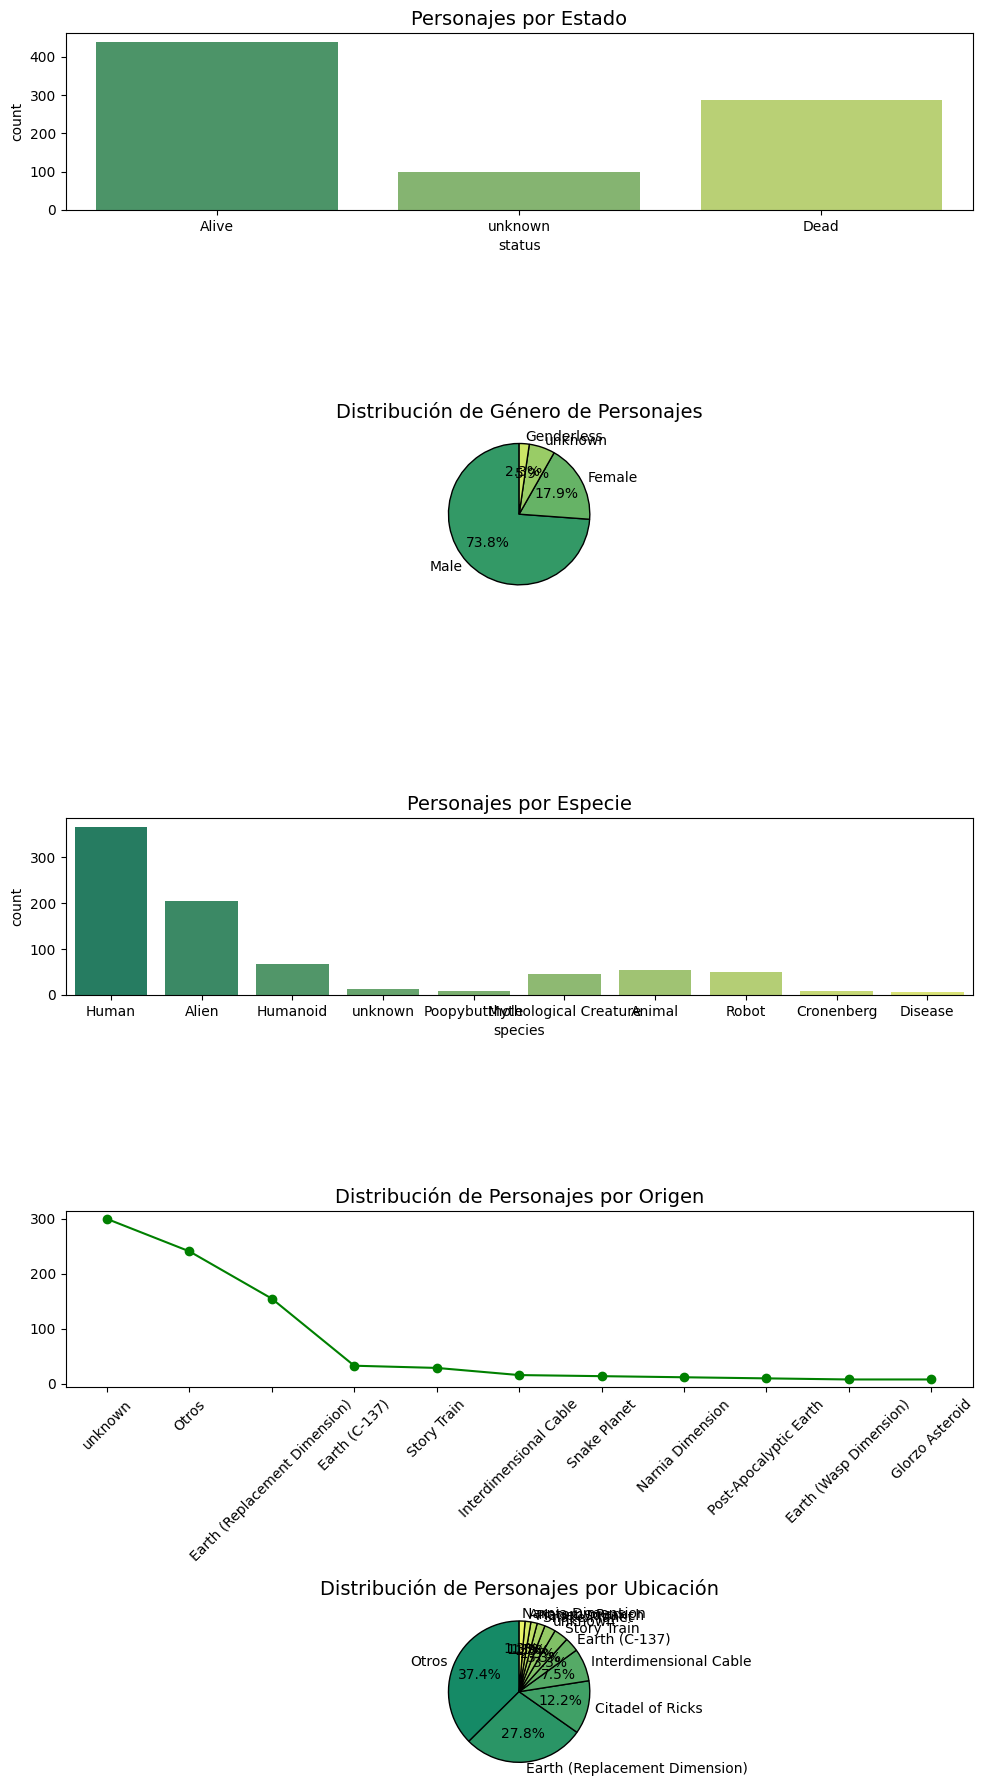

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraemos los datos de la API de Rick and Morty
def extract_data_from_api():
    base_url = "https://rickandmortyapi.com/api/character"
    characters = []

    while base_url:
        response = requests.get(base_url)
        if response.status_code == 200:
            data = response.json()
            characters.extend(data.get("results", []))
            base_url = data.get("info", {}).get("next")  # Cambiar al siguiente paginado
        else:
            print(f"Error en la solicitud: {response.status_code}")
            break

    print(f"Se han extraído {len(characters)} personajes.")
    return characters

# Limpiamos y organizamos los datos
def transform_data(characters):
    df = pd.DataFrame(characters)

    # Dejamos solo las columnas importantes
    relevant_columns = ["id", "name", "status", "species", "type", "gender", "origin", "location"]
    df = df[relevant_columns]

    # Normalizamos las columnas de tipo diccionario (origin y location)
    df["origin_name"] = df["origin"].apply(lambda x: x["name"] if isinstance(x, dict) else "")
    df["location_name"] = df["location"].apply(lambda x: x["name"] if isinstance(x, dict) else "")
    df.drop(columns=["origin", "location"], inplace=True)

    print(f"Datos transformados, total de registros limpios: {df.shape[0]}")
    return df

# Limitamos las categorías menos frecuentes y agrupamos como 'Otros'
def limit_categories(df, column, top_n=10):
    value_counts = df[column].value_counts()
    # Filtramos las categorías más frecuentes
    top_categories = value_counts.head(top_n).index
    # Agrupamos las categorías restantes en "Otros"
    df[column] = df[column].apply(lambda x: x if x in top_categories else "Otros")
    return df

# Cargamos el DataFrame en un archivo CSV
def load_data_to_csv(df, filename="rick_and_morty_characters.csv"):
    df.to_csv(filename, index=False)
    print(f"Datos cargados exitosamente en {filename}")

# Función que ejecuta el ETL
def run_etl():
    # Extracción
    characters = extract_data_from_api()

    # Transformación
    transformed_data = transform_data(characters)

    # Limitamos las categorías de 'species', 'location' y 'origin_name' para no sobrecargar los gráficos
    transformed_data = limit_categories(transformed_data, 'species')
    transformed_data = limit_categories(transformed_data, 'location_name')
    transformed_data = limit_categories(transformed_data, 'origin_name')

    # Carga
    load_data_to_csv(transformed_data)

    return transformed_data

# Generamos los gráficos
def generate_graphs(df):
    plt.figure(figsize=(10, 18))

    # Conteo de personajes por estado (Gráfico de barras)
    plt.subplot(5, 1, 1)
    sns.countplot(x="status", data=df, palette="summer")
    plt.title("Personajes por Estado", fontsize=14)

    # Conteo de personajes por género (Gráfico de torta)
    plt.subplot(5, 1, 2)
    gender_counts = df['gender'].value_counts()
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette("summer", len(gender_counts)),
            startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    plt.title("Distribución de Género de Personajes", fontsize=14)
    plt.gca().set_aspect('equal')  # Asegura que el gráfico sea circular

    # Conteo de personajes por especie (Gráfico de barras)
    plt.subplot(5, 1, 3)
    sns.countplot(x="species", data=df, palette="summer")
    plt.title("Personajes por Especie", fontsize=14)

    # Conteo de personajes por origen (Gráfico de líneas)
    plt.subplot(5, 1, 4)
    origin_counts = df['origin_name'].value_counts()
    plt.plot(origin_counts.index, origin_counts.values, marker='o', color='green')
    plt.title("Distribución de Personajes por Origen", fontsize=14)
    plt.xticks(rotation=45)

    # Conteo de personajes por ubicación (Gráfico de torta)
    plt.subplot(5, 1, 5)
    location_counts = df['location_name'].value_counts()
    plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette("summer", len(location_counts)),
            startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    plt.title("Distribución de Personajes por Ubicación", fontsize=14)
    plt.gca().set_aspect('equal')  # Asegura que el gráfico sea circular

    # Ajustamos el diseño
    plt.tight_layout()
    plt.show()

# Ejecutamos el ETL y generamos los gráficos
def run_etl_and_generate_graphs():
    # Ejecutamos el proceso ETL
    transformed_data = run_etl()

    # Generamos los gráficos a partir de los datos transformados
    generate_graphs(transformed_data)

# Ejecutamos el proceso completo
run_etl_and_generate_graphs()
